# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad de la moto 15
ingrese la aceleracion del policia 3
el tiempo en que alcanza su objetivo es 10.0


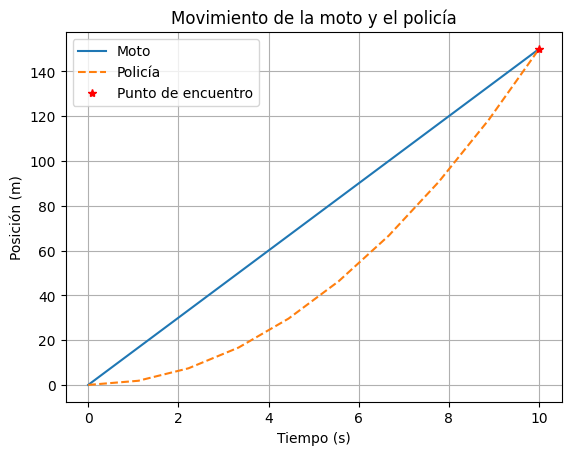

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
vmoto=int(input('Ingrese la velocidad de la moto '))
apolicia=int(input('ingrese la aceleracion del policia '))
a=0.5*apolicia
b=-vmoto
c=0
interior= b**2 - 4*a*c
raiz=np.sqrt(interior)
tiempo1=(-b+raiz)/(2*a)
tiempo2=(-b-raiz)/(2*a)
t = (
        tiempo1 if tiempo1 > 0 and (tiempo1 < tiempo2 or tiempo2 <= 0)
        else tiempo2 if tiempo2 > 0
        else None
    )
print('el tiempo en que alcanza su objetivo es', t)
tiempos = np.linspace(0, t, 10)
xmoto = vmoto * tiempos
xpolicia = 0.5 * apolicia * tiempos**2

plt.plot(tiempos, xmoto, label='Moto')
plt.plot(tiempos, xpolicia, label='Policía', linestyle='--')
plt.plot(t, vmoto*t, 'r*', label='Punto de encuentro')

plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.title('Movimiento de la moto y el policía')
plt.legend()
plt.grid(True)
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




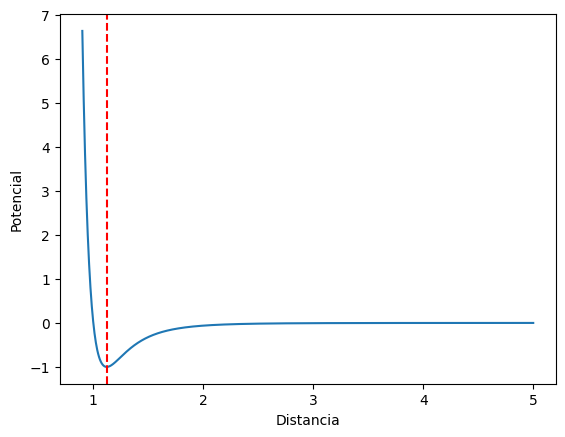

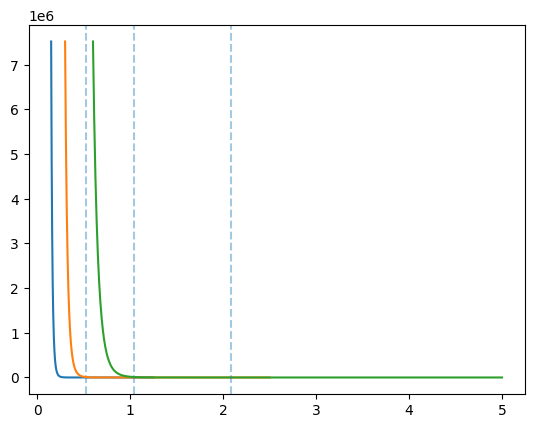

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def leonard(r,sigma,epsilon):
  return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)
#b
sigma=1.
epsilon=1.
rc=2.5*sigma
r=np.linspace(0.9*sigma,5*sigma,1000)
v=leonard(r,sigma,epsilon)
rm=2**(1/6) * sigma

plt.xlabel('Distancia')
plt.ylabel('Potencial')
plt.plot(r,v)
plt.axvline(rm, color='red', linestyle='--')
plt.show()
#c
sigma2=[0.5,1.,2.]
for sigma in sigma2:
    rn=np.linspace(0.3*sigma,2.5*sigma,1000)
    V = leonard(rn, sigma, epsilon)
    rm = 2**(1/16) * sigma
    plt.plot(rn, V, label=f'σ = {sigma}, $r_m$ ≈ {rm:.3f}')
    plt.axvline(rm, linestyle='--', alpha=0.4)



##3.  
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en (in) y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset income, haga un merge con el dataset alturas. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.

                     País  Altura 19 años, Hombre (cm)  \
0             Netherlands                          184   
1              Montenegro                          183   
2                 Estonia                          183   
3  Bosnia and Herzegovina                          182   
4                 Iceland                          182   

   Altura 19 años, Mujer (cm)  
0                         170  
1                         170  
2                         169  
3                         167  
4                         169  


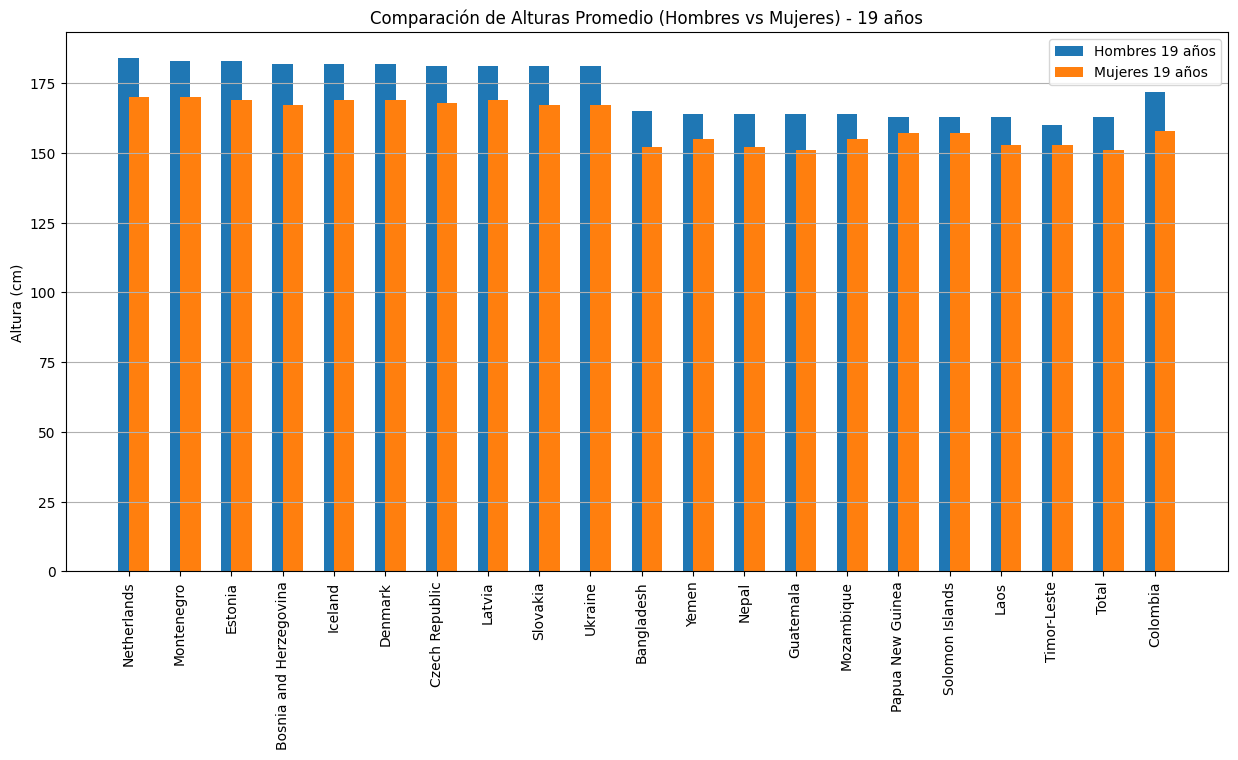

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"
# Read the HTML content
html_content = pd.read_html(url)
# Seleccionar tabla correcta: Edad 19 años
alturas_raw = html_content[0]
alturas = alturas_raw[[col for col in alturas_raw.columns if '(in)' not in col]]
alturas.columns = ["Índice", "País", "Altura 19 años, Hombre (cm)", "Altura 19 años, Mujer (cm)"]
alturas = alturas.drop(columns=["Índice"])
print(alturas.head())

# Top 10 mayores y menores
top10_mayores = alturas.head(10)
top10_menores = alturas.tail(10)
# Agregar Colombia si no está en top10
colombia = alturas[alturas["País"] == "Colombia"]

# Concatenar todo
df_grafico = pd.concat([top10_mayores, top10_menores, colombia]).drop_duplicates()

# Reset index
df_grafico = df_grafico.reset_index(drop=True)

# Graficar
x = df_grafico["País"]
hombres = df_grafico["Altura 19 años, Hombre (cm)"]
mujeres = df_grafico["Altura 19 años, Mujer (cm)"]

plt.figure(figsize=(15, 7))
plt.bar(x, hombres, width=0.4, label="Hombres 19 años", align='center')
plt.bar(x, mujeres, width=0.4, label="Mujeres 19 años", align='edge')
plt.xticks(rotation=90)
plt.ylabel("Altura (cm)")
plt.title("Comparación de Alturas Promedio (Hombres vs Mujeres) - 19 años")
plt.legend()
plt.grid(axis="y")
plt.show()
